<a href="https://colab.research.google.com/github/Lorandoff/Data-Science/blob/1/Game_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game market analysis

# Stages of research:



1. File

datasets/games.csv


2. Data preprocessing:

    2.1 Cast data to the right types

    2.2 Handling gaps if necessary

3. Exploratory data analysis

    3.1 How many games were released in different years. Is data for all periods important?
 
    3.2 How sales have changed by platform. Select the platforms with the highest total sales and plot the distribution by year.
    
        3.2.1 What is the typical period for new platforms to appear and old ones to disappear?

    3.3 Let's take the data for the corresponding actual period.

    3.4 Which platforms are leading in sales, rising or falling?

    3.5 Mustache box of global game sales by platform.

    3.6 How do reviews of users and critics affect sales within one popular platform.

        3.6.1 Conclusions with sales of games on other platforms.

    3.7 General distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?

    
    

4. User portrait for each region

    4.1 For users in each region (North America, Europe, and Japan), determine:
    
    4.2 Most popular platforms (top 5).

    4.3 Most popular genres (top 5).

    4.4 Does the ESRB rating affect sales in a particular region?


5. Hypothesis testing

    5.1 The average user rating of XOne and PC platforms is the same;

    5.3 Average user ratings for the Action and Sports genres differ

Set the threshold value alpha yourself.

Explanation

6. General conclusion

General conclusions

Recommendations

# Research objectives:

Determine the factors affecting the success of the game.

In [34]:
#!pip install plotly==3
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

data = pd.read_csv("datasets/games.csv")
display(data)
data.info()
print(data["Rating"].value_counts())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 30.1 MB 1.2 MB/s 
  Created wheel for plotly: filename=plotly-3.0.0-py3-none-any.whl size=36557531 sha256=161ebea8171ca3e037f919f7f51d22dd58748ae6dc0f63909eec8f78de1bd9be
  Stored in directory: /root/.cache/pip/wheels/cc/f1/0b/9cca229976bb5797daf743ed02eb37982122fa7e4cba539052
Successfully built plotly
  Attempting uninstall: plotly
    Found existing installation: plotly 5.11.0
    Uninstalling plotly-5.11.0:
      Successfully uninstalled plotly-5.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 3.0.0 which is incompatible.


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
E       399

# Description of data:

Name - the name of the game


Platform - platform


Year_of_Release - year of release


Genre - game genre


NA_sales - sales in North America (millions of copies sold)


EU_sales - sales in Europe (millions of copies sold)


JP_sales - sales in Japan (millions of copies sold)


Other_sales - sales in other countries (millions of copies sold)


Critic_Score - Critics score (maximum 100)


User_Score - user score (maximum 10)


Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

**Rating description:**

"E" ("Everyone") - "For everyone": The content is quite suitable for the age category of 6 years and older. Adults can also enjoy these games. Games with this rating may contain minimal violence, mostly "cartoon" in nature. The first game to receive this rating was The Simpsons Cartoon Studio, released in 1996. Originally "K-A" ("Kids to Adults")


"T" ("Teen") - "Teens": The game is suitable for persons from 13 years old. Projects in this category may contain violence, obscene scenes, crude humor, moderately explicit sexual content, gore, or infrequent use of profanity.


"M" ("Mature") - "Mature": Game content is not suitable for teenagers under 17 years old. Projects with this rating may contain sufficiently violent violence, a large amount of blood with dismemberment, obscene sex scenes, or strong profanity that is undesirable for younger audiences.


"E10+" ("Everyone 10 and older") - "For everyone 10 years and older": Projects with this rating may contain either a little more cartoon or soft violence, or somewhat explicit scenes, or a minimum amount of gore. The rating was adopted by the ESRB on March 2, 2005. The first game to receive this rating was Donkey Kong: Jungle Beat.


"EC" ("Early childhood") - "For young children": The game is suitable for children from 3 years old and does not contain material that parents might find inappropriate. Products that receive this rating are originally developed for children and are usually educational games. Some advanced educational games may be rated "Everyone".


K-A is the same as E.


"RP" ("Rating Pending") - "Rating Pending": The product has been submitted to the ESRB and is pending a rating. This logo is used only on promotional presentations and demo versions of games before the official release date.


"AO" ("Adults Only 18+") - "Adults Only": The content of the game is only for adults over 18 years old. Products in this category may contain extensive scenes of severe violence and/or very explicit sexual content, as well as nudity. Most of these games are designed for personal computers running Microsoft Windows and Apple Macintosh. The "Adults Only" rating is the subject of much discussion, as it imposes serious restrictions on the sales of the game.

# Data preprocessing

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  object 
 13  user_count       7590

0      2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

0.0    2426
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
1.5       2
1.1       2
1.9       2
9.6       2
9.7       1
Name: user_score, Length: 95, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  float64
 13  user_count       7590

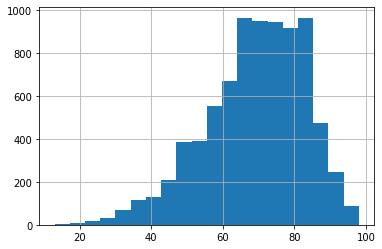

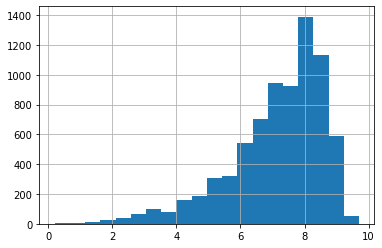

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,summary_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [35]:
data.columns = data.columns.str.lower()
display(data)
#Don't change the data type to datetime, because plotly.express will have problems with it later during the animation plotting.
#data["year_of_release"] = pd.to_datetime(data["year_of_release"], format = "%Y")
display(data)
print(data["user_score"].value_counts())
#Getting rid of gaps
for i in ["name","genre"]:
    data[i] = data[i].dropna()
data.info()

#Replacing because they are the same.
data["rating"] = data["rating"].replace("K-A", "E")

#A function that replaces the missing value with the category average in the desired column.
def fillbygroup(Data, row):
    genre_unique = Data["genre"].unique()
    for type in genre_unique:
        Data.loc[Data["genre"] == type, row] = Data.loc[Data["genre"] == type, row].fillna(Data[Data["genre"] == type][row].mean())
    return Data

print(data["critic_score"].value_counts())
print(data["user_score"].value_counts())

#data = fillbygroup(data, "critic_score")
data.info()
print(data["critic_score"].value_counts())

#Change the value of "tbd" to 0, although it could have been deleted immediately.
data["user_score"] = data["user_score"].replace("tbd", 0)
display(data["user_score"].value_counts())
data["user_score"] = data["user_score"].astype("float64")
#data = fillbygroup(data, "user_score")
print(data["user_score"].value_counts())
data.info()

#Get rid of 0 values and look at the data distribution.
data["user_score"] = data[data["user_score"] != 0]["user_score"]
print(data["user_score"].value_counts())
for i in ["critic_score","user_score"]:
    data[i].hist(bins = 20)
    plt.show()
    
data["summary_sales"] = data["na_sales"] + data["eu_sales"] + data["jp_sales"] + data["other_sales"]
display(data)

# Conclusions:

1. The value tbd (not yet rated) in the column with user ratings is replaced by 0 (I did this in order to change the data type and use the fiilbygroup function to replace the missing values ​​with the median for this genre distributed by genre, but then I realized that this would be not entirely correct and just removed 0 and gaps from the data), and removed because it does not represent much value.

2. I decided not to replace the gaps in the rating column due to the fact that although the ESRB organization for the most part gives the same rating to genres, there are cases, and there are many of them, when content is found in a game with the sports or racing genre due to which the game can be assigned a rating characteristic of another genre. Based on what has been said, it would be incorrect to replace the gaps in this column.

3. The total sales of the game have been added to the "summary_sales" column.

# Exploratory data analysis

## Let's see how many games were released in different years, and find a significant period

In [69]:
group_data = data.pivot_table(index = "platform", values = "summary_sales", aggfunc = "sum")
group_data.columns = ["summary_sales"]
group_data = group_data[group_data["summary_sales"] > 100]

grouped_year = data.pivot_table(index = "year_of_release", values = "summary_sales", aggfunc = "sum")
grouped_year.columns = ["sum"]


grouped_data = data.groupby(["platform","year_of_release"], as_index = False).sum()
grouped_data["summary_sales"] = grouped_data["na_sales"] + grouped_data["eu_sales"] + grouped_data["jp_sales"] + grouped_data["other_sales"]
grouped_data_year = grouped_data[["platform","year_of_release","summary_sales"]]
display(grouped_data)


group_data_top = group_data.sort_values("summary_sales", ascending = False).head(7)
fig1 = px.histogram(data, x = "year_of_release",barmode = "overlay",title = "Distribution of sales by years and platforms",color_discrete_sequence=px.colors.sequential.RdBu)
fig1.show(renderer = "colab")

fig3 = go.Figure(go.Scatter(x=grouped_year.index,
                    y=grouped_year["sum"],
                    line=dict (width=0.02),
                    mode = "markers + lines"))

mylayout = go.Layout(scene=dict(xaxis=dict( title="year_of_release"),
                                yaxis=dict( title="summary_sales")))

fig3.update_layout(xaxis = {"title" : "Sales statistics by years"})
fig3.show(renderer = "colab")

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,summary_sales
0,3DS,2011.0,20.14,13.32,7.03,3.24,43.68,3508.0,1559.0,356.3,3734.0,43.73
1,3DS,2012.0,14.78,10.01,12.38,2.22,39.37,2409.0,1234.0,237.4,5512.0,39.39
2,3DS,2013.0,5.95,4.75,4.22,0.97,15.90,1334.0,521.0,138.3,2471.0,15.89
3,3DS,2014.0,3.24,2.28,5.46,0.51,11.52,1229.0,686.0,127.4,1599.0,11.49
4,3DS,2015.0,3.87,2.55,3.52,0.61,10.58,1351.0,692.0,143.2,1997.0,10.55
...,...,...,...,...,...,...,...,...,...,...,...,...
132,XB,2007.0,0.41,0.12,0.00,0.02,0.55,221.0,42.0,21.7,20.0,0.55
133,XOne,2013.0,9.32,4.20,0.02,1.38,14.90,954.0,375.0,79.1,5849.0,14.92
134,XOne,2014.0,26.90,15.81,0.13,4.17,47.07,3194.0,1167.0,288.0,17447.0,47.01
135,XOne,2015.0,26.75,13.33,0.13,4.05,44.24,3507.0,1183.0,301.8,18189.0,44.26


# Conclusion:

As can be seen from the graphs, both the number of games and their sales increased from 1980 to 2008. A lot of independent developers and enthusiasts collected small investments and made projects (very different, very different genres, the market was underdeveloped and new genres and revolutionary technologies were created every year ), which subsequently collected several times more revenue.

But in 2008, after the advent of new technological smartphones to the market, the development of services such as google play and apple store, aggressive monetization of games on mobile platforms, huge profits compared to other platforms and simplicity, as well as the low cost of developing games on mobile devices, made it so that most developers began to release more games on mobile devices, however, after the fall of this market in 2010 - 2011, they began to return to old platforms and gradually restore this market, but do it carefully without huge cash injections.

Sources:
https://habr.com/en/post/109730/

https://ru.wikipedia.org/wiki/%D0%98%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80#2001%E2%80%942010

# Let's look at the distribution of sales by platform

In [41]:
grouped_data = grouped_data.query('summary_sales > 25')

fig2 = px.bar(grouped_data, x = "year_of_release", y = "summary_sales", color = "platform", barmode = "overlay",title = "Распределение продаж по годам и платформам",color_discrete_sequence=px.colors.sequential.RdBu)
fig2.update_traces(textposition='outside')
#fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig2.show(renderer = "colab")



grouped_data_year_50 = grouped_data_year.query('summary_sales > 50')
data_column_unique = grouped_data_year_50["platform"].unique()
fig = go.Figure()
for i in data_column_unique:
    data_platform = grouped_data_year_50[grouped_data_year_50["platform"] == i]
    data_platform = data_platform.dropna()
    fig.add_trace(go.Bar(x = data_platform["platform"],y = data_platform["summary_sales"], name = i))
fig.update_layout(barmode='stack', xaxis = {"title":"Distribution of platforms by total sales"})
fig.show(renderer = "colab")

grouped_data_year_old = grouped_data_year[(grouped_data_year["year_of_release"] > 2010) & (grouped_data_year["year_of_release"] <= 2014)]
grouped_data_year_new = grouped_data_year[grouped_data_year["year_of_release"] > 2014]

fig4 = go.Figure(data = [go.Pie(values = grouped_data_year_50["summary_sales"], labels = grouped_data_year_50["platform"], textinfo = "label + percent")])
fig4.update_layout(title = "Gaming platform market since 1997")
fig4.show(renderer = "colab")

fig4 = go.Figure(data = [go.Pie(values = grouped_data_year_old["summary_sales"], labels = grouped_data_year_old["platform"], textinfo = "label + percent")])
fig4.update_layout(title = "Gaming platform market from 2010 to 2014")
fig4.show(renderer = "colab")

fig3 = go.Figure(data = [go.Pie(values = grouped_data_year_new["summary_sales"], labels = grouped_data_year_new["platform"], textinfo = "label + percent")])
fig3.update_layout(title = "Gaming platform market since 2014")
fig3.show(renderer = "colab")

# Conclusion:

As you can see from the graphs, the most successful platforms in the last 30 years have been DS, PS, PS2, PS3, Wii, X360.

In recent years, namely in the period from 2010 to 2014, the leadership for PS3, Wii and X360, with the advent of a new generation in 2015 (PS4,3DS,XOne), the leadership remains with PS, but now the gap with Xbox is huge, ps is more than 47% market.

# Let's take a closer look by removing platforms with revenues of less than 50 million

In [42]:
group_data_100 = data.groupby(["year_of_release","platform"], as_index = False).sum()
group_data_150 = group_data_100.query('summary_sales > 50')
fig4 = px.bar(group_data_150, x = "year_of_release", y = "summary_sales", color = "platform", barmode = "overlay",title = "Распределение продаж по годам и платформам с выручкой боллее 50 млн", color_discrete_sequence=px.colors.sequential.RdBu)
fig4.show(renderer = "colab")

group_data_mean = group_data_100.groupby(["year_of_release","platform"], as_index = False).mean()
group_data_mean = group_data_mean.query("year_of_release > 1997")

fig_plot = go.Figure()
for i in list(group_data_mean["platform"].unique()):
    one_plot = group_data_mean[group_data_mean["platform"] == i]
    one_plot = one_plot.dropna()
    fig_plot.add_trace(go.Scatter(x = one_plot["year_of_release"], y = one_plot["summary_sales"], name = i))
fig_plot.update_layout(xaxis = {"title" : "Platform popularity statistics since 1997"}, yaxis = {"title" : "million copies sold"})
fig_plot.show(renderer = "colab")

#fig = px.bar(group_data_mean.sort_values("summary_sales", ascending = False).head(5), x = "platform", y = "summary_sales", color = "platform", animation_frame = "year_of_release", animation_group = "platform")
#fig.show()

# Determine the lifetime of the platforms

In [68]:
group_data_top_names = list(group_data_top.index)

print(group_data_top_names)
for i in group_data_top_names:
    print("Platform:", i)
    data_top_platform = pd.pivot_table(data.query('platform == @i'),index = ["platform","year_of_release"], values = "summary_sales",aggfunc = "sum")
    data_top_platform.columns = ["sum"]
    fig = go.Figure(data = [go.Pie(values = data_top_platform["sum"], labels = data_top_platform.index, textinfo = "label + percent")])
    print(data_top_platform)
    fig.show(renderer = "colab")

data_top = data.query('platform in @group_data_top_names and year_of_release > 2005')

data_top = data_top.groupby(["year_of_release", "platform"], as_index = False).sum()

#Create animation
fig5 = px.bar(data_top, x = "platform", y = "summary_sales", color = "platform", animation_frame = "year_of_release", animation_group = "platform")
fig5.show(renderer = "colab")




['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA']
Platform: PS2
                             sum
platform year_of_release        
PS2      2000.0            29.50
         2001.0           145.96
         2002.0           169.99
         2003.0           144.27
         2004.0           188.34
         2005.0           117.70
         2006.0            75.98
         2007.0            48.08
         2008.0            21.15
         2009.0             4.45
         2010.0             0.59


Platform: X360
                             sum
platform year_of_release        
X360     2005.0             7.64
         2006.0            48.92
         2007.0            89.39
         2008.0           129.16
         2009.0           110.67
         2010.0           157.36
         2011.0           129.50
         2012.0            95.68
         2013.0            74.82
         2014.0            10.10


Platform: PS3
                             sum
platform year_of_release        
PS3      2006.0            19.62
         2007.0            68.52
         2008.0           109.86
         2009.0           118.46
         2010.0           125.25
         2011.0           134.87
         2012.0            94.30
         2013.0           102.21
         2014.0            11.34
         2015.0             0.02


Platform: Wii
                             sum
platform year_of_release        
Wii      2006.0           135.02
         2007.0           127.31
         2008.0           130.99
         2009.0           151.01
         2010.0            67.92
         2011.0            33.49
         2012.0            13.23


Platform: DS
                            sum
platform year_of_release       
DS       2004.0            3.38
         2005.0           96.03
         2006.0           72.56
         2007.0           77.47
         2008.0           62.69
         2009.0           39.42
         2010.0           25.29
         2011.0            4.36
         2012.0            1.02


Platform: PS
                            sum
platform year_of_release       
PS       1994.0            1.26
         1996.0           17.47
         1997.0           30.92
         1998.0           43.11
         1999.0           48.98
         2000.0           45.66
         2001.0           19.14
         2002.0            0.11


Platform: GBA
                            sum
platform year_of_release       
GBA      2001.0           36.62
         2002.0           27.72
         2003.0           23.89
         2004.0           33.37
         2005.0            7.53
         2006.0            2.57


# Conclusion:


The lifetime of a platorma, namely the moment of its maximum popularity, is 4 years, so it would be fair to take a sample from 2013 and leave only significant platforms in it (the most popular in the old generation, the new generation and PC).

# Create a selection of the current period for us

In [13]:
print(data["platform"].value_counts())
data_new = data.query('year_of_release > 2012')
data_new_platform = data.query('platform == ["PS4","XOne","PS3","X360","3DS","PC"] and year_of_release > 2012')
display(data_new_platform)
display(data_new)

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,summary_sales
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16678,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16681,Aikatsu Stars! My Special Appeal,3DS,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16695,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,0.01


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,summary_sales
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Strawberry Nauts,PSV,2016.0,Adventure,Unknown,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16711,Aiyoku no Eustia,PSV,2014.0,Misc,dramatic create,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01


# Conclusion:

In order to make a forecast for 2017, we need to take up-to-date data for the current period with current platforms.

Based on the previous graphs, we can say that the actual period will be the sample from 2013, since all relevant generations of significance are present in this segment. It doesn’t make sense to take it earlier because the results will be distorted by the values ​​of previous generations, and as we found out from the distribution of sales over the years, the revenue of gaming platforms is falling every year.

We will consider the incredibly successful PS3 and X360, the new generation of game consoles (PS4, XOne, 3DS), as well as the PC as current platforms, since this platform, although it has small sales, is quite stable.

# Build a mustache box for global sales by platform

PS3

       summary_sales
count     345.000000
mean        0.525884
std         1.451939
min         0.010000
25%         0.040000
50%         0.150000
75%         0.510000
max        21.050000


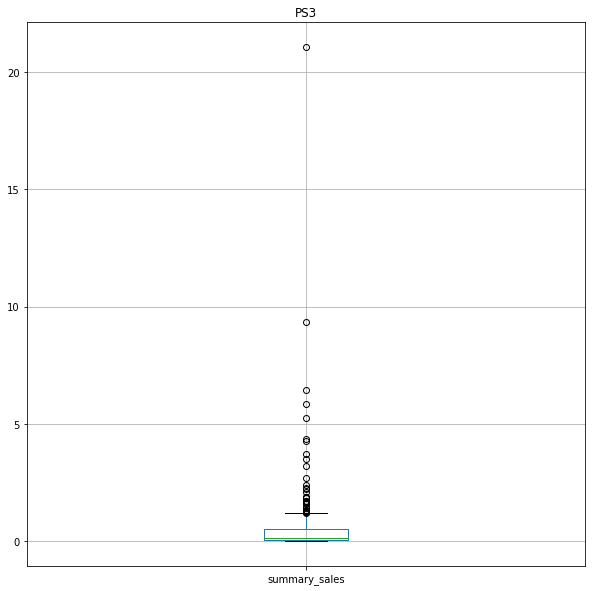

X360

       summary_sales
count     186.000000
mean        0.735484
std         1.663275
min         0.010000
25%         0.080000
50%         0.265000
75%         0.795000
max        16.270000


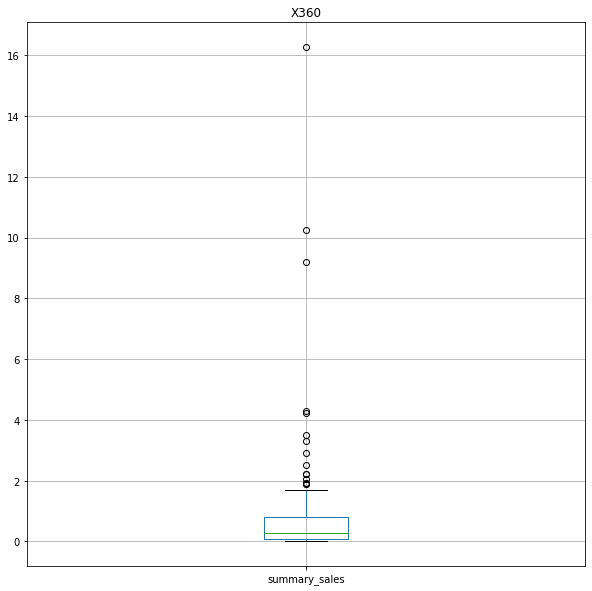

PS4

       summary_sales
count     393.000000
mean        0.799440
std         1.607861
min         0.010000
25%         0.060000
50%         0.200000
75%         0.730000
max        14.630000


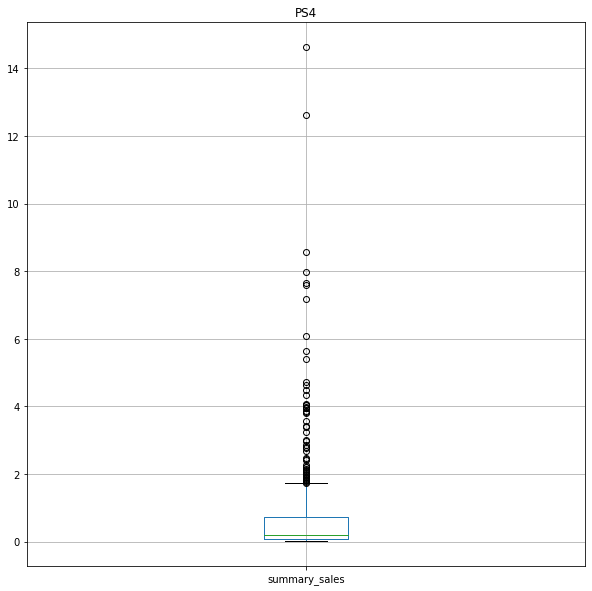

3DS

       summary_sales
count     303.000000
mean        0.472772
std         1.381347
min         0.010000
25%         0.040000
50%         0.090000
75%         0.280000
max        14.600000


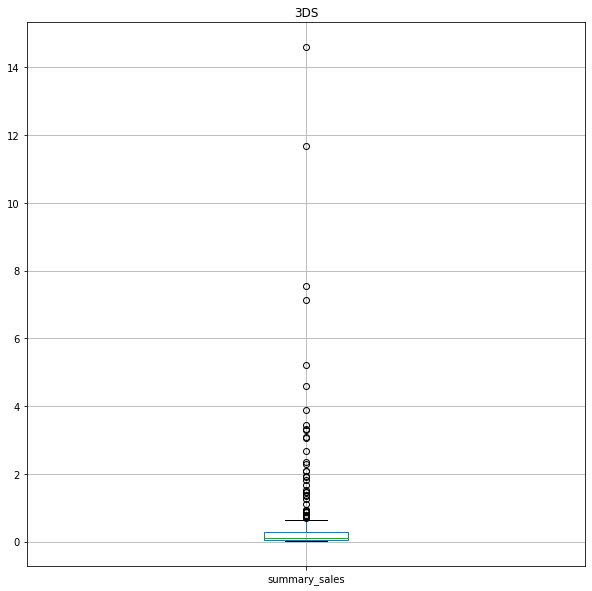

XOne

       summary_sales
count     247.000000
mean        0.645020
std         1.036139
min         0.010000
25%         0.060000
50%         0.220000
75%         0.685000
max         7.390000


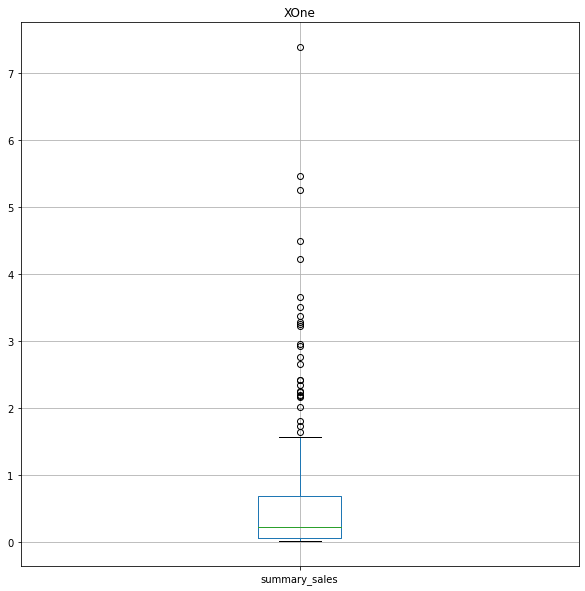

PC

       summary_sales
count     189.000000
mean        0.208624
std         0.352304
min         0.010000
25%         0.030000
50%         0.080000
75%         0.230000
max         3.050000


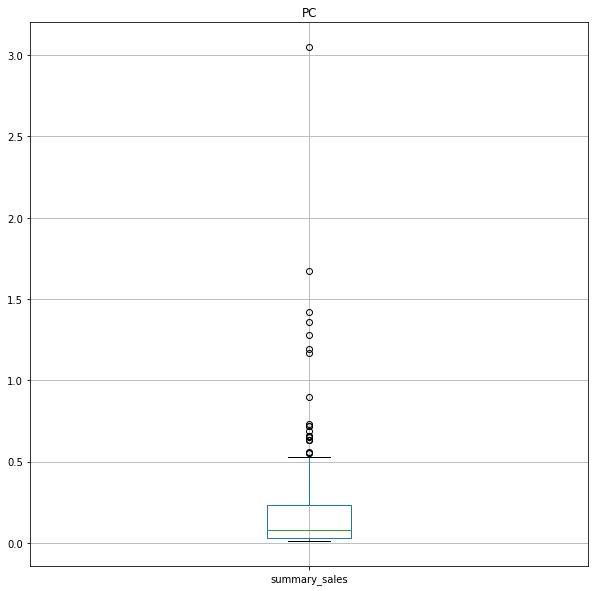

In [17]:
data_columns_2 = data_new_platform["platform"].unique()
for i in data_columns_2:
    data_one = data_new_platform[data_new_platform["platform"] == i]
    print(i)
    print()
    print(data_one[["summary_sales"]].describe())
    data_one.boxplot("summary_sales", figsize = (10,10))
    plt.title(i)
    plt.show()

# Conclusion:

The PS3 has 21M titles while the X360 tops out at $16, but the X360 has a higher average (0.73 vs 0.52m) with fewer games (186 vs 345). The PS4 has a higher average compared to the previous generation (0.8 vs. 0.52 million), while the XOne, on the contrary, has a lower average compared to the previous generation (0.64 vs. 0.73 million), the 3DS loses to the old and new generation PS and XBOX (average 0.47 million dollars), and the PC, in turn, loses 3DS (average 0.2 million dollars).

# Let's see how reviews affect sales, using the example of PS4

In [67]:
data_ps4 = data_new_platform.query('platform == "PS4"')

markercolor = data_ps4["user_score"]

fig3 = go.Scatter3d(x=data_ps4["critic_score"],
                    y= data_ps4["summary_sales"],
                    z = data_ps4["user_score"],
                    marker=dict(color=markercolor,
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=10),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="critic_score"),
                                yaxis=dict( title="summary_sales"),
                                zaxis=dict( title="user_score")))

#3D graphs are not working in colab
#Plot and save html
iplot({"data": [fig3],
    "layout": mylayout}) 
#fig3.show(renderer = "colab")
#fig0_anim = px.scatter(data_ps4.sort_values("year_of_release",ascending = True), animation_frame = "year_of_release", animation_group = "genre", x = "critic_score", y = "summary_sales", color = "genre", size = "user_score")
#fig0_anim.show()

In [48]:
data_ps4 = data_ps4.dropna()
fig0 = px.scatter(data_ps4, x = "critic_score", y = "summary_sales", color = "genre", size = "user_score", title = "Dependence of PS4 sales on reviews from critics and players")
fig0.show(renderer = "colab")

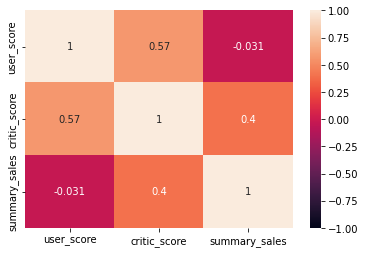

In [50]:
fig_score = px.scatter(data_ps4,x = "critic_score", y = "user_score", title = "Dependence of critics' rating on players' ratings")
fig_score.show(renderer = "colab")
fig_score_critic = px.scatter(data_ps4, x = "critic_score", y = "summary_sales", title = "Dependence of critics' rating on total sales")
fig_score_critic.show(renderer = "colab")
fig_score_user = px.scatter(data_ps4, x = "user_score", y = "summary_sales", title = "Dependence of player ratings on total sales")
fig_score_user.show(renderer = "colab")

#Let's look at the correlation of user ratings, critic ratings and total sales
fig_score_corr = data_new_platform[["user_score","critic_score","summary_sales"]]
fig_score_corr_ps4 = data_ps4[["user_score","critic_score","summary_sales"]]
sns.heatmap(fig_score_corr_ps4.corr(), vmin = -1, vmax = 1, annot = True)
plt.show()

# Conclusion:

As can be seen from the graphs and the heat map of the correlation, there is no correlation between sales and critic reviews on PS4 or it is very weak, the same situation with player reviews, judging by the heat map, there is no connection at all, but looking at the graphs, we can assume that the higher feedback from players means less sales. Also, players and critics do not always agree, the players mostly like games with low sales, they give them the highest ratings.

# Compare the results obtained with the results on other platforms

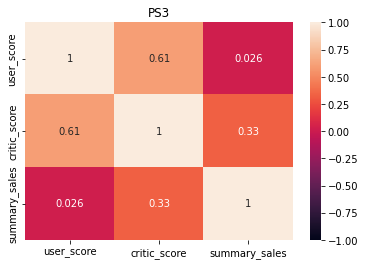

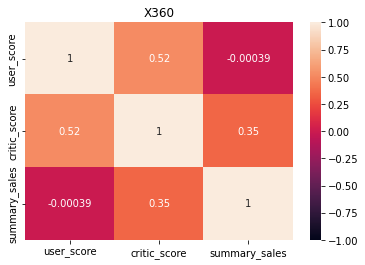

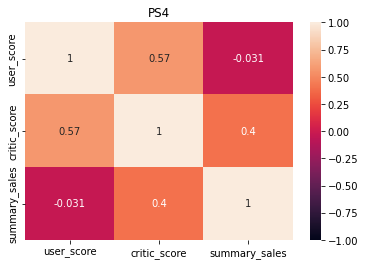

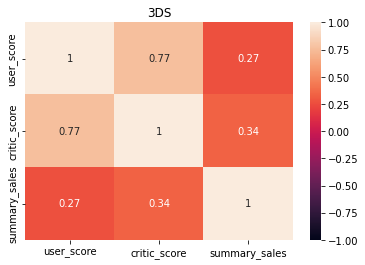

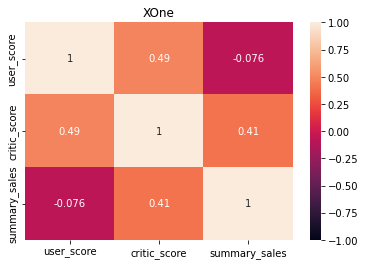

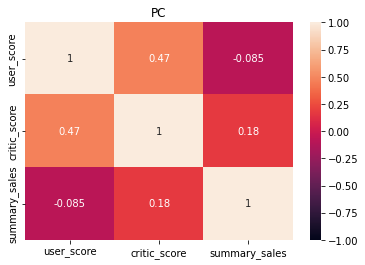

In [51]:
data_column_unique = data_new_platform["platform"].unique()
for i in data_column_unique:
    data_platform = data_new_platform[data_new_platform["platform"] == i]
    data_platform = data_platform.dropna()
    sns.heatmap(data_platform[["user_score","critic_score","summary_sales"]].corr(), vmin = -1, vmax = 1, annot = True)
    plt.title(i)
    plt.show()
    fig0 = px.scatter(data_platform, x = "critic_score", y = "summary_sales", color = "genre", size = "user_score", labels = {"critic_score": "critics' score " + i})
    fig0.show(renderer = "colab")



# Conclusion:

As with PS4, there is no significant relationship between ratings and sales on other platforms, the only thing is that on the 3DS players almost always agree with the opinion of critics. And on PC, no one cares about reviews at all.

# Let's look at the distribution of sales by genre

In [52]:
data_genre_unique = data_new_platform.groupby(["platform","year_of_release","genre"], as_index = False).sum()
display(data_genre_unique)
data_genre_unique = data_genre_unique.query('summary_sales > 1')
data_genre_grouped = data_genre_unique.groupby("genre")["summary_sales"].sum()
data_genre_uniques = data_genre_unique["genre"].unique()
data_genre_count = data["genre"].value_counts()
#print(data_genre_count)
data = data.dropna()
data_genre = data["genre"].unique()

data_genre_count = data_new_platform.groupby("genre")["platform"].count()

#Create a dictionary of keys with the names of the genre and the value of their number
data_to_genre = {}
for i in data_genre:
    data_to = data[data["genre"] == i]["genre"].count()
    data_to_genre[i] = data_to
#print(data_to_genre)

data_to_genre_series = pd.Series(data_to_genre)
#print(data_to_genre_series)

#Let's build bars for each genre
figures = go.Figure()
for i in list(data_to_genre_series.index.unique()):
    data_one = data_to_genre_series[data_to_genre_series.index == i]
    figures.add_trace(go.Bar(x = data_one.index, y = data_one, name = i))
figures.show(renderer = "colab")

#Look at the total share of genres across all platforms
fig3 = go.Figure(data = [go.Pie(values = data_genre_count, labels = data_genre_count.index, textinfo = "label + percent")])
fig3.update_layout(title = "Total share of genres across all platforms")
fig3.show(renderer = "colab")

,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,summary_sales
0,3DS,2013.0,Action,4.23,3.24,3.84,0.67,12.01,519.0,204.0,70.7,1644.0,11.98
1,3DS,2013.0,Adventure,0.35,0.32,1.03,0.06,1.75,136.0,32.0,11.1,28.0,1.76
2,3DS,2013.0,Fighting,0.00,0.00,0.11,0.00,0.11,0.0,0.0,0.0,0.0,0.11
3,3DS,2013.0,Misc,0.63,0.74,1.76,0.12,3.26,57.0,47.0,6.3,117.0,3.25
4,3DS,2013.0,Platform,1.92,1.96,0.58,0.35,4.81,201.0,59.0,20.6,180.0,4.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,XOne,2016.0,Role-Playing,0.77,0.43,0.00,0.12,1.33,238.0,44.0,23.2,744.0,1.32
228,XOne,2016.0,Shooter,6.91,3.74,0.00,1.04,11.72,924.0,360.0,72.0,3557.0,11.69
229,XOne,2016.0,Simulation,0.04,0.08,0.00,0.01,0.13,118.0,24.0,6.3,63.0,0.13
230,XOne,2016.0,Sports,3.05,2.61,0.00,0.53,6.18,652.0,208.0,61.2,774.0,6.19


# Conclusion:

The most popular genres were Action, RP, Sports, Shooter, Adventure. Now let's look at their distribution by platform.

In [53]:
fig_genres = px.bar(data.query('summary_sales > 10'),x = "year_of_release", y = "summary_sales", color = "genre", title = "popularity of genres by years", barmode = "overlay")
fig_genres.show(renderer = "colab")

fig_genres_platform = px.bar(data.query('summary_sales > 5'), x = "genre", y = "summary_sales", color = "platform", labels = {"genre" : "genre profitability chart"}, color_discrete_sequence=px.colors.sequential.RdBu, barmode = "overlay")
fig_genres_platform.show(renderer = "colab")

fig_platform_genres = px.bar(data.query('summary_sales > 5'), x = "platform", y = "summary_sales", color = "genre", labels = {"platform": "popularity of genres across platforms"})
fig_platform_genres.show(renderer = "colab")

# Conclusion:

Popular genres have been constantly changing over the years, from 1998 to 2004 Racing and Action were popular, in 2006 there was a boom in the popularity of the genre of sports games and indie games, and by 2012 the Action and Shooter genres secured unconditional leadership.

However, Sports, Racing, Misc and Platform turned out to be the most profitable genres.

    For the Sports genre, the most popular platforms were PS3 (6.46 million copies sold), PS4 (6.08), X360 (6.19), Wii (82.54) and PS (5.02),
    
    For Racing GBA(5.48), 3DS(12.65), PS2(14.97) and Wii(28.91),
    
    For Genre Misc PS2(5.12), DS(20,14), X360(21.82), Wii(28.91),
    
    For genre Platform WiiU(5.23), PS3(5.82), GC(6.31), PS(7.13), 3DS(9.9), Wii(28.32), DS(29.8).
    

For the most profitable platforms Wii, PS3, X360, PS, DS, PS2, the most profitable genres were:

    For Wii: Sports, Racing, Platform
    
    For PS3: Action, Shooter, Racing
    
    For X360: Shooter, Action, Misc
    
    For PS: Action, Racing, RP
    
    For DS: Racing, Platform, Misc, Puzzle
    
    For PS2: Action, Racing, RP

In [54]:
dataa = []
for i in data_genre_uniques:
    data_genre = data_genre_unique[data_genre_unique["genre"] == i]
    data_genre = data_genre.groupby("genre")["summary_sales"].sum()
    dataa.append(go.Bar(x = data_genre.index ,y = data_genre ,name = i))
    
fig_genre = go.Figure(data = dataa)
fig_genre.update_layout(barmode='overlay',xaxis = {"title": "popular charts from top platforms"})
fig_genre.show(renderer = "colab")

# Compose a user profile for 3 regions (na, eu, jp)

## Find the top 5 genres for each region

In [57]:
#na_user = data_new_platform.groupby("genre")["na_sales"].sum()
#eu_user = data_new_platform.groupby("genre")["eu_sales"].sum()
#jp_sales = data_new_platform.groupby("genre")["jp_sales"].sum()
data_new_unique = data_new_platform["genre"].unique()

for i in ["na_sales", "eu_sales", "jp_sales"]:
    group_data = data_new_platform.groupby(["genre",i], as_index = False).sum()
    print(group_data.groupby("genre")["genre"].count().sort_values(ascending = False))
    fig_hist = px.histogram(group_data, x = "genre", labels = {"genre" : "distribution in the region " + i + " by genre"}) 
    fig_hist.show(renderer = "colab")

genre
Action          94
Shooter         89
Sports          75
Role-Playing    56
Misc            34
Fighting        30
Platform        28
Racing          27
Adventure       23
Simulation      16
Strategy        14
Puzzle           3
Name: genre, dtype: int64


genre
Action          85
Shooter         82
Sports          56
Role-Playing    51
Racing          39
Misc            25
Platform        25
Adventure       24
Fighting        24
Simulation      24
Strategy        16
Puzzle           6
Name: genre, dtype: int64


genre
Role-Playing    47
Action          43
Misc            22
Shooter         21
Fighting        20
Sports          19
Adventure       15
Platform        12
Simulation      12
Strategy        11
Puzzle           6
Racing           6
Name: genre, dtype: int64


In [58]:
fig = go.Figure()
for i in ["na_sales","eu_sales","jp_sales"]:
    country_user = data_new_platform.groupby("genre")[i].sum()
    country_user = country_user.dropna()
    for genre in data_new_unique:
        country_user_genre = country_user[country_user.index == genre]
        fig.add_trace(go.Bar(x = country_user_genre.index, y = country_user_genre, name = i))
fig.update_layout(barmode = "overlay")
fig.show(renderer = "colab")

# Conclusion:

Top 5 popular genres for North America: Action, Shooter, Sports, RP, Misc.

Top 5 popular genres for Europe: Action, Shooter, Sports, RP, Racing.

Top 5 popular genres for Japan: RP, Action, Misc, Shooter, Fighting.

Americans and Europeans are for the most part similar in their choice of genres, while the Japanese differ markedly in this regard.

## Let's look at the distribution of ratings for each region

In [59]:
for i in ["na_sales", "eu_sales", "jp_sales"]:
    group_data = data_new_platform.groupby(["rating",i], as_index = False).sum()
    fig_hist = px.histogram(group_data, x = "rating", labels = {"rating" : "распределение в регионе " + i + " в  разбивке по рейтингу"}) 
    fig_hist.show(renderer = "colab") 

In [60]:
fig_rating = go.Figure()
for i in ["na_sales","eu_sales","jp_sales"]:
    country_rating = data_new_platform.groupby("rating")[i].sum()
    country_rating = country_rating.dropna()
    for rating in list(data_new_platform["rating"].unique()):
        country_rating_one = country_rating[country_rating.index == rating]
        fig_rating.add_trace(go.Bar(x = country_rating_one.index, y = country_rating_one, name = i))
fig_rating.update_layout(barmode = "overlay")
fig_rating.show(renderer = "colab")

# Conclusion:

For North America, the distribution is:
    
     1st place: M rating
    
     2nd place: Rated E
    
     3rd place: E10+ and T rating
    
    
For Europe:

     1st place: M rating
    
     2nd place: Rated E
    
     3rd place: T rating
    
     4th place: E10+ rating
    
   
For Japan:

     1st place: M rating
    
     2nd place: T rating
    
     3rd place: rating E
    
     4th place: E10+ rating
    

Here, too, Americans and Europeans have a similar distribution, while Japan has more teen-rated games.

## Find the top 5 platforms for each region

In [62]:
for i in ["na_sales", "eu_sales", "jp_sales"]:
    group_data = data_new_platform.groupby(["platform",i], as_index = False).sum()
    fig_hist = px.histogram(group_data, x = "platform", labels = {"platform" : "распределение в регионе " + i + " в разбивке по платформам"})
    fig_hist.show(renderer = "colab")
fig = go.Figure()

# Conclusion:

Top 5 for North America: PS4, XOne, X360, PS3, 3DS


Top 5 for Europe: PS4, PS3, XOne, X360, PC


Top 5 for Japan: 3DS, PS3, PS4, X360, XOne


Consistent results for each region, PS4's success in North America and Europe is due to the global popularity of the console, XBOX for North America is due to the fact that this region is a priority for XBOX where XBOX has the most success, so XOne sells better there than in Europe, due to for the resounding success of the X360 in its time. In Europe, the PC is in the top 5, and in Japan, the 3DS is one of the most successful consoles of all time, and it also has a lot of niche exclusives that are probably played by all of Japan. 2nd and 3rd place is occupied by Sony consoles, for the same reason as the 3DS, they are Japanese.

## Let's look at revenue statistics by platform

In [63]:
dataa = []

for i in ["summary_sales","na_sales","eu_sales","jp_sales"]:
    data_mean = data.groupby("year_of_release", as_index = False).agg({"genre": "count",
                                                                       i : "mean",
                                                                       "platform" : "count",
                                                                       "rating" : "count"})
    
    dataa.append(go.Scatter(x = data_mean["year_of_release"], y = data_mean[i], name = i))
fig = go.Figure(data = dataa)
fig.show(renderer = "colab")

fig1 = px.bar(data_new_platform, x = "rating", y = "summary_sales", barmode = "overlay")
fig1.show(renderer = "colab")

# Conclusion:

For a long time, North America was the leader in revenue, Europe was in 2nd place, and Japan was in 3rd place, but in 2016 Europe seized the lead and now it has the most revenue among the regions.

# Testing hypotheses

# Average user rating for Xone and PC is the same

     Null Hypothesis: Average user ratings for Xone and PC are the same
    
    
     Alternative Hypothesis: Average Xone and PC User Ratings Differ

In [64]:
data_xbox = data_new_platform[(data_new_platform["platform"] == "XOne") & (data_new_platform["user_score"] > 0)]["user_score"]
data_pc = data_new_platform[(data_new_platform["platform"] == "PC") & (data_new_platform["user_score"] > 0)]["user_score"]

alpha = .05

result = st.ttest_ind(data_xbox,data_pc)

print(result.pvalue)
print("XOne: ", data_xbox.mean())
print("PC: ", data_pc.mean())

if result.pvalue < alpha:
    print("Null hypothesis rejected")
else:
    print("Failed to reject the null hypothesis")

0.14012658403611647
XOne:  6.521428571428572
PC:  6.2696774193548395
Failed to reject the null hypothesis


**These results are due to the fact that Microsoft with XOne, unlike Sony with PS4, does not adhere to the policy of exclusivity of games on its platform, including releasing them on PC.**

# Average user ratings for Action and Sports are different

         Null Hypothesis: Average user ratings for Action and Sports are the same
        
        
         Alternative Hypothesis: Average user ratings for Action and Sports are different

In [65]:
data_action = data_new_platform[(data_new_platform["genre"] == "Action") & (data_new_platform["user_score"] > 0)]["user_score"]
data_sport = data_new_platform[(data_new_platform["genre"] == "Sports") & (data_new_platform["user_score"] > 0)]["user_score"]

alpha = .05

result = st.ttest_ind(data_action,data_sport)

print(result.pvalue)
print("Action: ", data_action.mean())
print("Sports: ", data_sport.mean())

if result.pvalue < alpha:
    print("Null hypothesis rejected")
else:
    print("Failed to reject the null hypothesis")

2.329368959283221e-23
Action:  6.767080745341615
Sports:  5.22972972972973
Null hypothesis rejected


# General conclusion:

1. The most popular platforms over the past 30 years have been DS, PS, PS2, PS3, X360, 3DS, PS4.

2. The most popular platforms since 2014 are 3DS, XOne, PS4.

3. Since 2008, the revenue in the gaming industry has been constantly falling, but there is a chance for a revival after a new generation gains momentum.

4. The average life span of a platform is 4 years.

5. Most popular game genres: Action, RP, Sports, Shooter, Misc, Fighting.

6. By 2016, Europe overtook North America in terms of revenue and ranks 1st in terms of revenue in the gaming industry, 2nd behind North America, 3rd place in Japan.

7. The average user rating of XOne and PC is the same (6.52 and 6.3 respectively)

8. The average user rating of the Action and Sports genres is different (6.8 and 5.2 respectively)


Recommendations for a gaming company:

    1. Focus on PS4, because this platform makes up 47% of the market and has the most revenue.
    
    2. The popularity of the game is influenced by the genre, the most popular genres are: Action, RP, Shooter or Sports.
    
    3. Focus on the Western market.
    
    4. Watch M-rated games - there are the most of them and they are the best sellers.